In [4]:
##import libraries
!pip install tqdm
from tqdm import tqdm
import gym
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`np.bool8` is a deprecated alias for `np.bool_`")


In [5]:
env=gym.make('Taxi-v3')

In [6]:
env.reset()##only [0] gives the state so we assign Q(s,a) the s here as env.reset()[0]

(407, {'prob': 1.0, 'action_mask': array([0, 1, 0, 0, 0, 0], dtype=int8)})

In [7]:
####define all functions-gen_episode,take_action,q_learn,monte_carlo and update as per
q_table_ql=defaultdict(lambda:np.zeros(6))
q_table_mc=defaultdict(lambda:np.zeros(6))###becase theres 500 possible states a key of that state will be created as when encountered
#q table has state as the key, q_table[state] gives a list with index as action value and its value i.e q_table[state][action=index]=q(s,a) value

In [8]:
def take_action(state,q_table):
    if random.random()<epsilon:###greedy algo to take action
        action=env.action_space.sample()
    else:
        action=np.argmax(q_table[state])###since index is the action
    return action
        

In [9]:
def gen_episode_ql(q_table):
    episode_reward=0
    done=False
    state=env.reset()[0]
    while not done:###timestep updation required for q-learning
        action=take_action(state,q_table)
        next_state,reward,done,_,_=env.step(action)
        q_table[state][action]+=alpha*(reward+max(q_table[next_state])*gamma-q_table[state][action])##update for q_learning
        state=next_state
        episode_reward+=reward
    #epsilon = max(min_epsilon, epsilon * epsilon_decay)
    return episode_reward
        

In [10]:
##def update_monte(q_table):
    


Q Learning: 100%|██████████| 5000/5000 [00:06<00:00, 771.54it/s] 


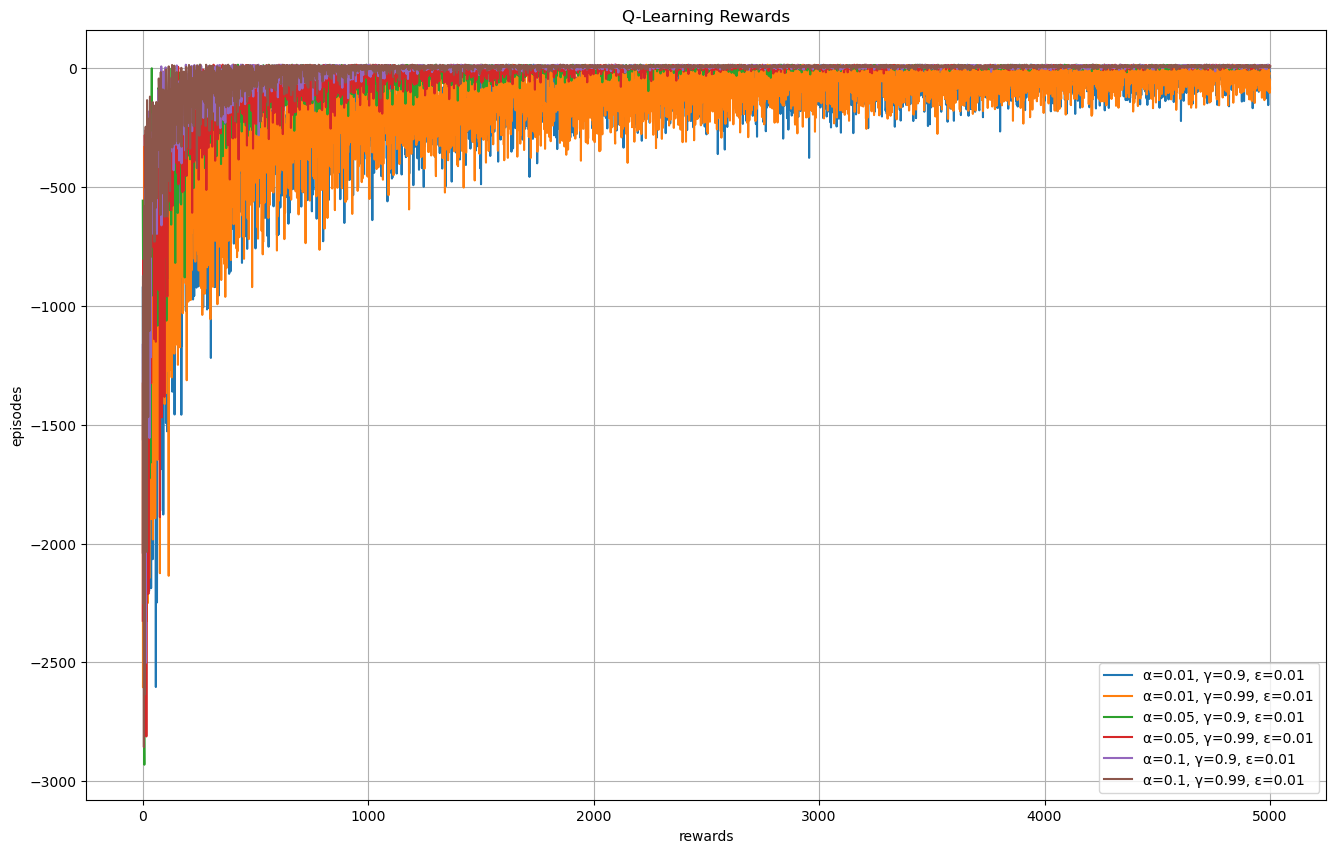

In [15]:
###function to get all
from tqdm import tqdm
alpha_values = [0.01, 0.05, 0.1]
gamma_values = [0.9, 0.99]
epsilon_values = [0.1]
results=[]
for alpha in alpha_values:
    for gamma in gamma_values:
        for epsilon in epsilon_values:
            
            q_table_ql=defaultdict(lambda:np.zeros(6))
            #q_table_mc=defaultdict(lambda:np.zeros(6))
            #alpha = 0.1  # Learning rate
            #gamma = 0.99  # Discount factor
            #epsilon = 0.1  # Exploration rate
            epsilon_decay = 0.99
            min_epsilon = 0.01
            episode_data=[]
            #episodes = 1000
            done=False
            x_episodes=[]
            reward_after_each_episode_ql=[]
            reward_after_each_episode_mc=[]
            episodes=5000
            for episode in tqdm(range(1,episodes+1),desc="Q Learning"):
                #state=env.reset()[0]
                x_episodes.append(episode)
                reward_after_each_episode_ql.append(gen_episode_ql(q_table_ql))
                epsilon = max(min_epsilon, epsilon * epsilon_decay)
            results.append((alpha,gamma,epsilon,reward_after_each_episode_ql))
plt.figure(figsize=(16,10))
plt.grid(True)
for alpha,gamma,epsilon,reward_after_each_episode in results:
#print(reward_after_each_episode_ql,reward_after_each_episode_mc)
    #plt.figure(figsize=(10,6))
    #plt.grid(True)
    plt.plot(x_episodes,reward_after_each_episode,label=f'α={alpha}, γ={gamma}, ε={epsilon}')
plt.title('Q-Learning Rewards')
plt.xlabel('rewards')
plt.ylabel('episodes')
plt.legend()
plt.show()
    #plt.plot(x_episodes,reward_after_each_episode_mc)
    #plt.legend
    